In [8]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [9]:
dataset_name = 'energy_efficiency'
shapes = {
    'S': (7,5,4),
    'V2': (4,),
    'V3': (3,)
}
epochs = 50
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([8], [2])


### S(X,X,X)

Average elapsed k-fold validation time: 64.08679 sec
Last measures: [0.10370228439569473, 0.21134178340435028, 0.14094984531402588, 0.15901687741279602, 0.0061311423778533936, 0.016586599871516228, 0.008604958653450012, 0.009685098193585873, 0.15896561741828918, 0.17024074494838715, 0.017873717471957207, 0.06435482203960419, 0.007814611308276653, 0.11793489754199982, 0.005649866070598364, 0.08452830463647842, 0.06430115550756454, 0.0692937895655632, 0.26917171478271484, 0.20267826318740845, 0.01266029104590416, 0.21134178340435028, 0.007753307931125164, 0.26917171478271484, 0.20268259942531586, 0.01656353287398815, 0.15016506612300873, 0.0071074520237743855, 0.007538624107837677, 0.1618758887052536]
Loss history average: [0.20852812 0.19913017 0.18993803 0.18029559 0.16983506 0.15787011
 0.14636698 0.13778212 0.13215169 0.12808935 0.12301212 0.11815562
 0.11433845 0.11137385 0.10894515 0.10696797 0.10404704 0.10053696
 0.09853849 0.09743735 0.0966749  0.09604336 0.09552835 0.09510418
 

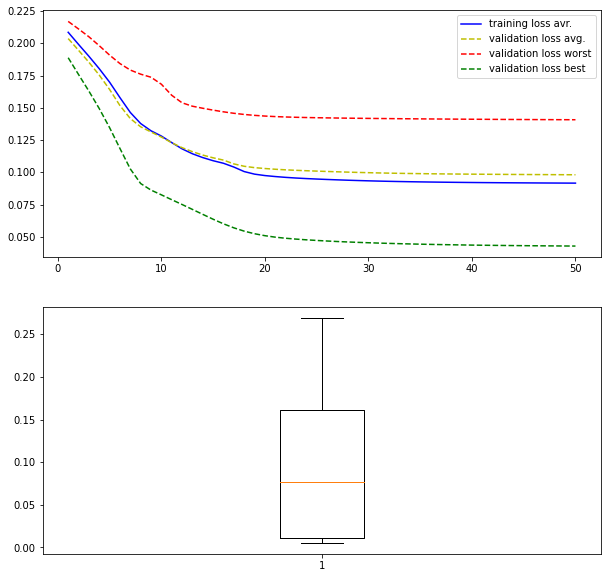

In [10]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 79.58360 sec
Last measures: [0.0187103021889925, 0.21134178340435028, 0.14308544993400574, 0.1597244143486023, 0.12314549833536148, 0.1637946367263794, 0.011751551181077957, 0.03711121901869774, 0.16184619069099426, 0.2863750159740448, 0.02288016676902771, 0.15016748011112213, 0.1419648826122284, 0.040457967668771744, 0.17081226408481598, 0.09826867282390594, 0.09763482213020325, 0.24098627269268036, 0.15957011282444, 0.12269587069749832, 0.10370269417762756, 0.09754309058189392, 0.24098627269268036, 0.26917171478271484, 0.12287473678588867, 0.022425290197134018, 0.039477329701185226, 0.24098627269268036, 0.26917171478271484, 0.12264060974121094]
Loss history average: [0.21868635 0.21095374 0.20366522 0.19653905 0.18947777 0.18251582
 0.17584556 0.16979096 0.16465804 0.16055133 0.15735319 0.15484876
 0.15282515 0.15110312 0.14953919 0.14802126 0.14653427 0.14506612
 0.14361022 0.14215323 0.14071672 0.13935996 0.13813373 0.13707579
 0.13618174 0.1

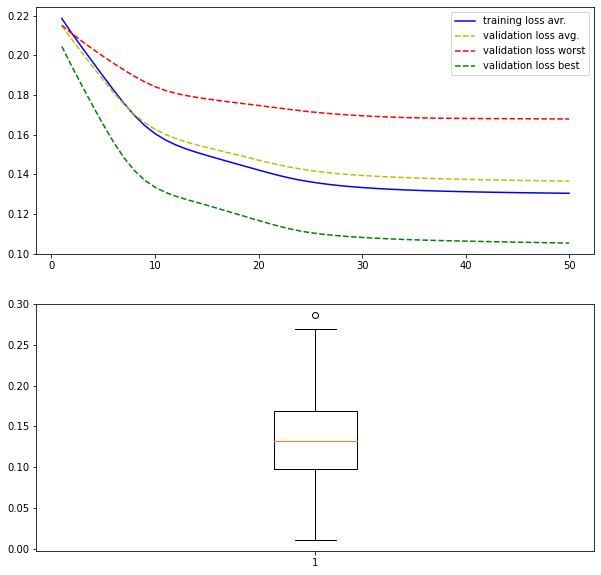

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 91.38079 sec
Last measures: [0.11648619920015335, 0.21134178340435028, 0.24098627269268036, 0.26917171478271484, 0.010773440822958946, 0.033357519656419754, 0.016664527356624603, 0.011253200471401215, 0.11954109370708466, 0.2863750159740448, 0.1637946367263794, 0.020392999053001404, 0.014831400476396084, 0.01764206402003765, 0.01043753046542406, 0.08578749746084213, 0.014736462384462357, 0.01088477298617363, 0.013544819317758083, 0.01122406218200922, 0.1637946367263794, 0.014437595382332802, 0.24098627269268036, 0.0117914117872715, 0.01042469497770071, 0.025314509868621826, 0.21134178340435028, 0.010873902589082718, 0.16017521917819977, 0.2863750159740448]
Loss history average: [0.21414291 0.20591256 0.19690691 0.18750033 0.1782475  0.16936411
 0.16034263 0.1503877  0.14115502 0.13497627 0.13053287 0.12745048
 0.1255372  0.12420018 0.12310817 0.12210312 0.12111795 0.12012529
 0.11911212 0.11807248 0.11700543 0.11590761 0.11477268 0.11359601
 0.11

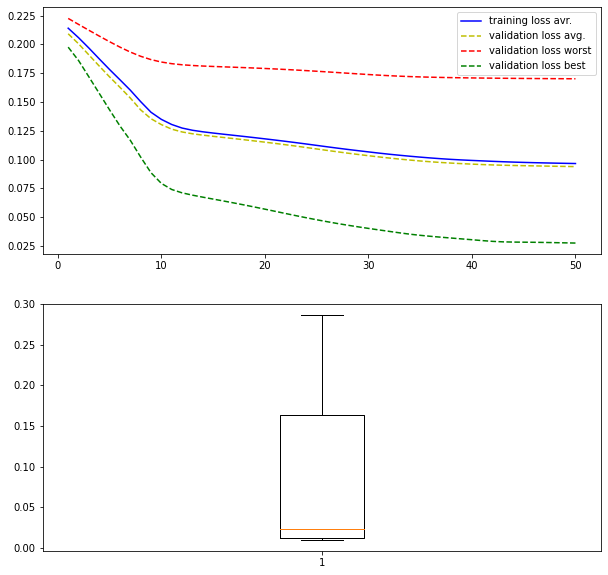

In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 78.31243 sec
Last measures: [0.041928134858608246, 0.09733671694993973, 0.14151322841644287, 0.01591729186475277, 0.2863750159740448, 0.1637946367263794, 0.21134178340435028, 0.14178818464279175, 0.26917171478271484, 0.2863750159740448, 0.04343817010521889, 0.12547628581523895, 0.007855023257434368, 0.26917171478271484, 0.007859752513468266, 0.11649341136217117, 0.12444251030683517, 0.10716383904218674, 0.11785738915205002, 0.0069444007240235806, 0.1637946367263794, 0.09855833649635315, 0.03671905770897865, 0.15943285822868347, 0.12316420674324036, 0.09903696924448013, 0.21134178340435028, 0.13985230028629303, 0.19139046967029572, 0.2863750159740448]
Loss history average: [0.21663036 0.20970417 0.20324365 0.19707466 0.19108233 0.18517127
 0.1793228  0.17365212 0.16843716 0.16400838 0.16052507 0.15786759
 0.15576016 0.15394771 0.15228097 0.15072883 0.14930248 0.14799307
 0.14682051 0.14576743 0.14481025 0.14397493 0.14324139 0.14258212
 0.14199036

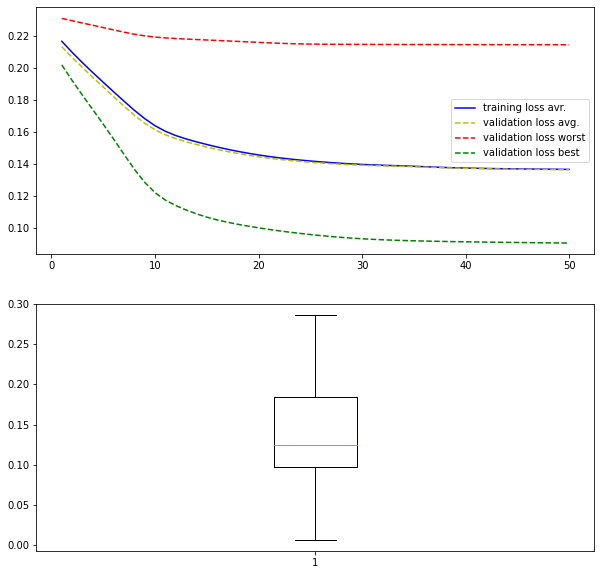

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 91.14027 sec
Last measures: [0.1637946367263794, 0.015877893194556236, 0.016073670238256454, 0.012632511556148529, 0.010032158344984055, 0.026598794385790825, 0.017953330650925636, 0.012757743708789349, 0.019921252503991127, 0.009493386372923851, 0.03557642549276352, 0.014561066403985023, 0.009039642289280891, 0.021118387579917908, 0.011282753199338913, 0.1637946367263794, 0.013199813663959503, 0.1705290526151657, 0.26917171478271484, 0.012985212728381157, 0.03758102282881737, 0.02311074361205101, 0.24098627269268036, 0.26917171478271484, 0.009622675366699696, 0.05640149861574173, 0.01389035303145647, 0.013503074645996094, 0.19138821959495544, 0.010027307085692883]
Loss history average: [0.20736249 0.19698835 0.18686067 0.17688573 0.16676759 0.15640499
 0.14540789 0.13356077 0.12338256 0.11494928 0.10798344 0.10298419
 0.09990508 0.09768619 0.0957933  0.09402979 0.092307   0.09060664
 0.0889359  0.08729634 0.08568778 0.08411948 0.08260268 0.08114

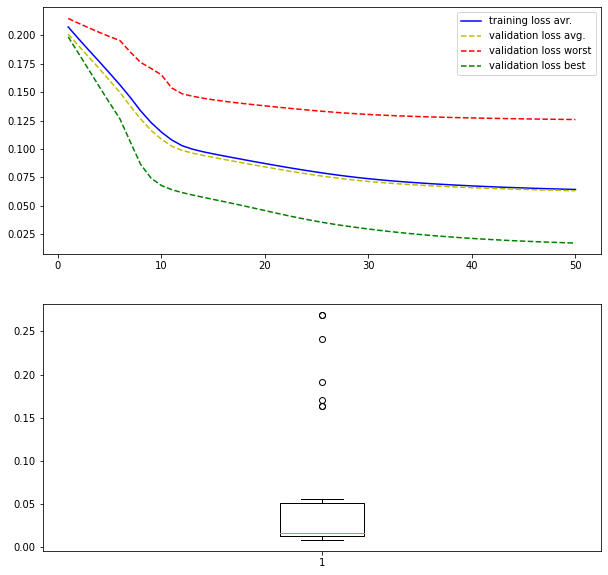

In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)